In [338]:
import pandas as pd
import numpy as np

VA_df = pd.read_csv("VA_Jobs_Mortgage_Rates.csv")
VA_county_df = pd.read_csv("VA_Home_Sales_Count_Prices_Merged.csv")

In [339]:
VA_county_df

,County_City,Month,Year,Sale_Count,Median_Sale_Value
0,Accomack County,Apr,2016,42,160000.0
1,Accomack County,Aug,2016,37,159950.0
2,Accomack County,Dec,2016,31,140100.0
3,Accomack County,Feb,2016,15,154000.0
4,Accomack County,Jan,2016,21,145000.0
...,...,...,...,...,...
11394,York County,Mar,2023,101,401270.0
11395,York County,May,2023,114,410000.0
11396,York County,Nov,2023,66,411025.0
11397,York County,Oct,2023,50,410000.0


In [340]:
VA_df

,Month,Year,30-Year_Fixed,15-Year_Fixed,5-1_Year_Adj
0,May,2016,3.61,2.86,2.80
1,Jun,2016,3.66,2.92,2.88
2,Jul,2016,3.41,2.74,2.68
3,Aug,2016,3.43,2.74,2.73
4,Sep,2016,3.46,2.77,2.83
...,...,...,...,...,...
64,Sep,2021,2.87,2.18,2.43
65,Oct,2021,2.99,2.23,2.52
66,Nov,2021,3.09,2.35,2.54
67,Dec,2021,3.11,2.39,2.49


In [341]:
#Aggregate the averages of all counties per month in the county df

average_by_month = VA_county_df.groupby(['Month', 'Year']).agg({'Sale_Count':'mean', 'Median_Sale_Value':'mean'}).reset_index()

average_by_month

March_Data = average_by_month['Month'] == 'Monthly_Mortgage_Rates.csv'

In [342]:
avg_month_sorted = average_by_month.sort_values(by=['Month','Year'])

va_avg_home_sales_prices = avg_month_sorted.copy()
va_avg_home_sales_prices.to_csv("va_avg_home_sales_prices.csv", index=False)

avg_month_sorted 


,Month,Year,Sale_Count,Median_Sale_Value
0,Apr,2016,78.992188,194065.780547
1,Apr,2017,83.023622,211624.633858
2,Apr,2018,84.859375,210415.144531
3,Apr,2019,86.218750,222617.195312
4,Apr,2020,80.578125,243615.238281
...,...,...,...,...
84,Sep,2020,104.000000,258596.869231
85,Sep,2021,104.204724,284160.326772
86,Sep,2022,79.283465,305636.385827
87,Sep,2023,61.715385,327606.992308


In [343]:
#Sort them chronologically
VA_county_df["Year"] = VA_county_df["Year"].astype(str)
# Create date column with the date data already there
VA_county_df['Date'] = pd.to_datetime(VA_county_df['Month'] + ' ' + VA_county_df['Year'])

# Group the data by 'Date' and calculate the mean of the sale values
average_by_date = VA_county_df.groupby(['Month','Year'])['Median_Sale_Value'].mean().round(2).reset_index()

# Sort the DataFrame by 'Date'
average_by_date_sorted = average_by_date.sort_values(by=['Year','Month'])

# Display the resulting DataFrame
average_by_date_sorted


/var/folders/q0/62b3m8qn6bvd3_bd3b18nw540000gn/T/ipykernel_99707/3319087541.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  VA_county_df['Date'] = pd.to_datetime(VA_county_df['Month'] + ' ' + VA_county_df['Year'])


,Month,Year,Median_Sale_Value
0,Apr,2016,194065.78
7,Aug,2016,209099.80
15,Dec,2016,199408.13
23,Feb,2016,182094.36
30,Jan,2016,189552.01
...,...,...,...
55,Mar,2023,321243.17
63,May,2023,331314.14
71,Nov,2023,324663.20
79,Oct,2023,328599.38


In [344]:
avg_month_sorted['Month'] = avg_month_sorted['Month'].astype(str)
avg_month_sorted['Year'] = avg_month_sorted['Year'].astype(int)
avg_month_sorted.dtypes


Month                 object
Year                   int64
Sale_Count           float64
Median_Sale_Value    float64
dtype: object

In [345]:
VA_df['Month'] = VA_df['Month'].astype(str)
VA_df['Year'] = VA_df['Year'].astype(int)
VA_df.dtypes

Month             object
Year               int64
30-Year_Fixed    float64
15-Year_Fixed    float64
5-1_Year_Adj     float64
dtype: object

In [346]:
# Merge the DataFrames on the 'Year' and 'Month' columns
VA_house_prediction_data = pd.merge(avg_month_sorted, VA_df, on=['Year', 'Month'], how='inner')

VA_house_prediction_data.rename(columns={'Median_Sale_Value': 'Average_Median_Sale_Value'}, inplace=True)

# Display the resulting DataFrame
VA_house_prediction_data

,Month,Year,Sale_Count,Average_Median_Sale_Value,30-Year_Fixed,15-Year_Fixed,5-1_Year_Adj
0,Mar,2021,93.623077,273704.026923,3.02,2.34,2.73


In [347]:
VA_house_prediction_data.to_csv('VA_house_prediction_data.csv', index=False)


Linear Regression


In [348]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

LR_df = pd.read_csv("VA_sales_prices_mortage_rates_merged.csv")

# Convert Date to datetime and extract year and month
LR_df['Date'] = pd.to_datetime(LR_df['Date'])
LR_df['Year'] = LR_df['Date'].dt.year
LR_df['Month'] = LR_df['Date'].dt.month

# Drop the original Date column
LR_df.drop(columns=['Date'], inplace=True)


In [379]:
# Define features (X) and target (y)
X = LR_df.drop(columns=['Median_Sale_Value'])
y = LR_df['Median_Sale_Value']

In [380]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [381]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

LinearRegression()

In [382]:
y_pred = model.predict(X_test)


/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [386]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5448.227459587459
Mean Squared Error (MSE): 41858661.54872349
Root Mean Squared Error (RMSE): 6469.827010726291
R-squared (R²): 0.934925507512198


/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [387]:
# Get the model's intercept (beta_0)
intercept = model.intercept_

# Get the model's coefficients (beta_1, beta_2, ..., beta_n)
coefficients = model.coef_

# Construct the equation string
equation = f"y = {intercept:.2f} "
equation += " + ".join([f"{coef:.2f}*{feature}" for coef, feature in zip(coefficients, X_train.columns)])

print("Equation of the prediction line:")
print(equation)

Equation of the prediction line:
y = -33011778.35 205.38*Sale_Count + 34979.02*va_mortage_jobs.30-Year_Fixed + -22381.18*va_mortage_jobs.15-Year_Fixed + -26423.64*va_mortage_jobs.5-1_Year_Adj + 16466.02*Year + 1709.04*Month


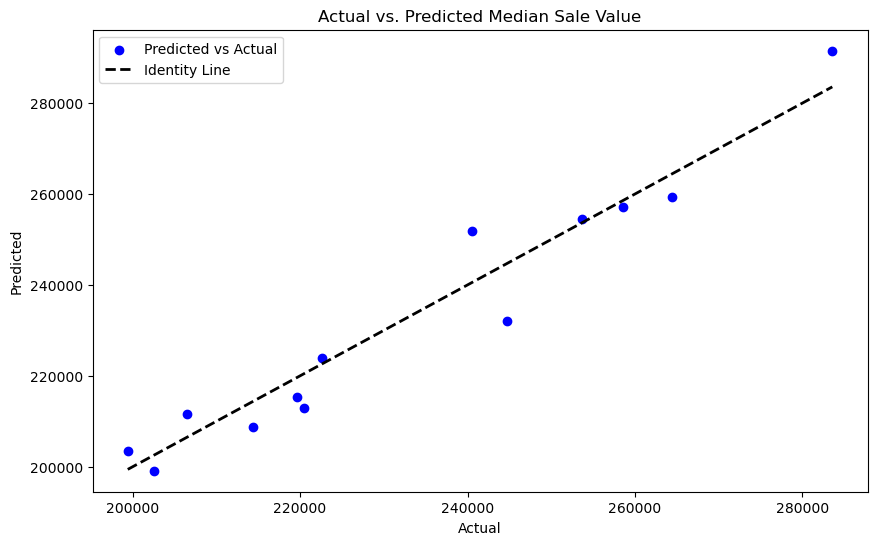

In [388]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Identity Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Median Sale Value')
plt.legend()
plt.show()

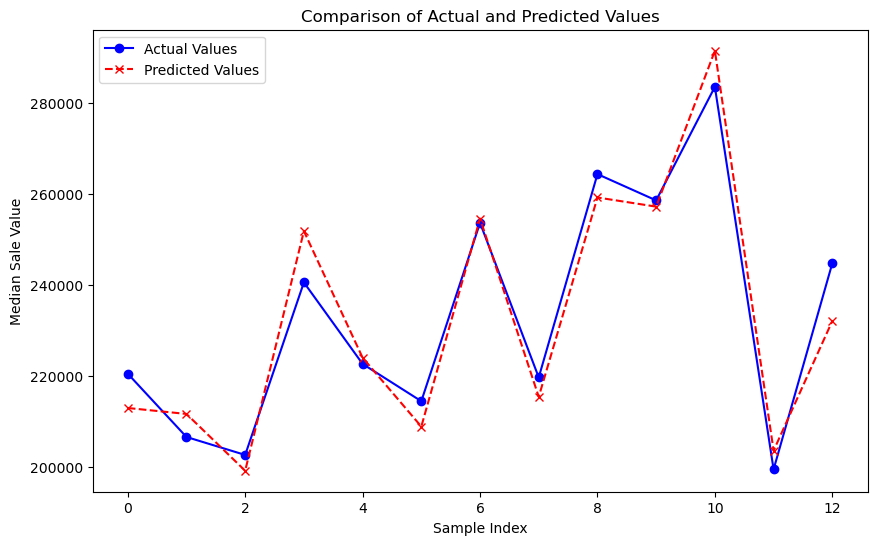

In [389]:
# Plotting differences in predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Median Sale Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()


In [390]:
# Create a DataFrame to hold feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Calculate the absolute value of coefficients to determine influence
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()

# Sort the DataFrame by 'Absolute_Coefficient' in descending order
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted DataFrame
print(coefficients_df)

                         Feature   Coefficient  Absolute_Coefficient
1  va_mortage_jobs.30-Year_Fixed  34979.024836          34979.024836
3   va_mortage_jobs.5-1_Year_Adj -26423.644486          26423.644486
2  va_mortage_jobs.15-Year_Fixed -22381.178809          22381.178809
4                           Year  16466.017858          16466.017858
5                          Month   1709.035371           1709.035371
0                     Sale_Count    205.384499            205.384499


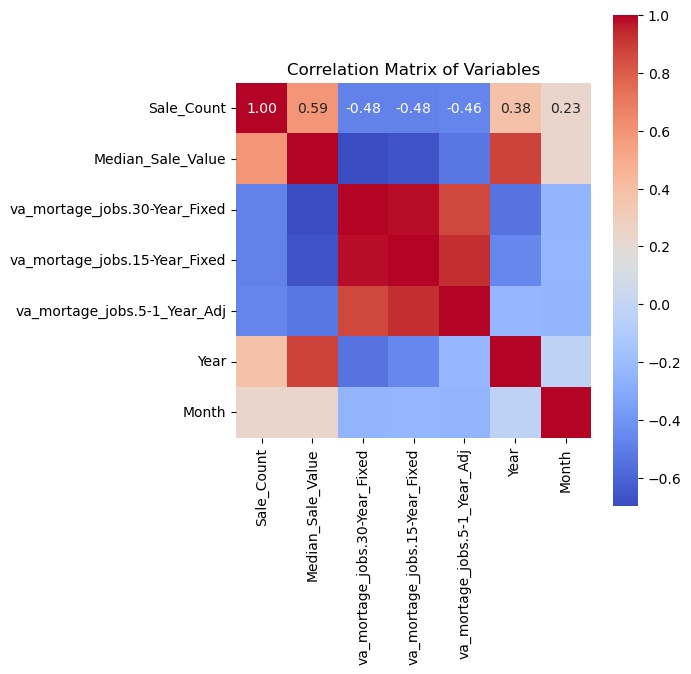

In [391]:
import seaborn as sns

corr_matrix = LR_df.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

In [392]:
corr_matrix

,Sale_Count,Median_Sale_Value,va_mortage_jobs.30-Year_Fixed,va_mortage_jobs.15-Year_Fixed,va_mortage_jobs.5-1_Year_Adj,Year,Month
Sale_Count,1.000000,0.592167,-0.481538,-0.478634,-0.464228,0.379979,0.233075
Median_Sale_Value,0.592167,1.000000,-0.696001,-0.665689,-0.524668,0.880612,0.236710
va_mortage_jobs.30-Year_Fixed,-0.481538,-0.696001,1.000000,0.985819,0.866511,-0.538538,-0.239677
va_mortage_jobs.15-Year_Fixed,-0.478634,-0.665689,0.985819,1.000000,0.928833,-0.463334,-0.237306
va_mortage_jobs.5-1_Year_Adj,-0.464228,-0.524668,0.866511,0.928833,1.000000,-0.225820,-0.242253
Year,0.379979,0.880612,-0.538538,-0.463334,-0.225820,1.000000,-0.028926
Month,0.233075,0.236710,-0.239677,-0.237306,-0.242253,-0.028926,1.000000
